In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/turkiye-student-evaluation_generic.csv")

In [3]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [44]:
unlabelled_df = df.drop('instr',axis=1)
unlabelled_df.shape

(5820, 32)

In [6]:
unlabelled_df.head()

,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,2,1,0,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,2,1,2,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,2,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
from sklearn.preprocessing import StandardScaler

In [12]:
s = StandardScaler()
unlabelled_df = s.fit_transform(unlabelled_df)
type(unlabelled_df)

numpy.ndarray

In [15]:
unlabelled_df = pd.DataFrame(unlabelled_df)
unlabelled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [7]:
from sklearn.cluster import KMeans

In [31]:
wcss = []

In [32]:
for i in range (1,10):
    km = KMeans(n_clusters=i,init='k-means++',random_state = 42)
    km.fit(unlabelled_df)
    wcss.append(km.inertia_)

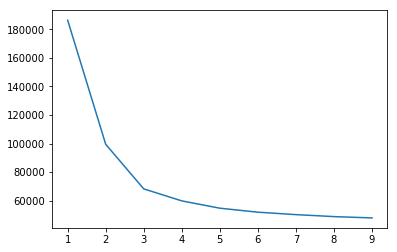

In [33]:
#elbow method
plt.plot(range(1,10),wcss)

In [36]:
km_opt = KMeans(n_clusters=3,init='k-means++',random_state = 42)

In [37]:
km_opt.fit(unlabelled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [38]:
km_opt.inertia_

68250.383767175852

In [39]:
km_opt.cluster_centers_

array([[ 0.07545616,  0.06439986, -0.31783672, -0.20414245, -1.14587494,
        -1.30008258, -1.33600029, -1.28461223, -1.34162501, -1.32821106,
        -1.30679361, -1.29537471, -1.31301325, -1.34960433, -1.32634068,
        -1.26714396, -1.45083464, -1.4779554 , -1.4634329 , -1.41143742,
        -1.41436111, -1.42939922, -1.44997015, -1.46601216, -1.46048564,
        -1.45621374, -1.42577289, -1.40033443, -1.45276734, -1.41693757,
        -1.36111235, -1.43257717],
       [-0.02345388, -0.06666154,  0.17199969,  0.02510455,  0.86644289,
         0.92091312,  0.8862837 ,  0.90145289,  0.94103369,  0.90982993,
         0.93335484,  0.92999472,  0.8922773 ,  0.95946781,  0.88613865,
         0.90253108,  0.90851207,  0.89297788,  0.89174578,  0.93568815,
         0.80237356,  0.91118417,  0.90398361,  0.8871737 ,  0.87888663,
         0.88154281,  0.93325294,  0.93268661,  0.8797395 ,  0.90741365,
         0.89478082,  0.8604426 ],
       [-0.01707557,  0.02961783,  0.00256836,  0.0825

In [40]:
centers.shape

(4, 32)

In [50]:
km_opt.inertia_

68250.383767175852

In [51]:
cluster_labels = km_opt.predict(unlabelled_df)
cluster_labels.shape

(5820,)

In [52]:
resdf = pd.DataFrame(columns = ['Instructor','ClusterLabel'])

In [53]:
resdf['Instructor'] = df['instr']

In [54]:
resdf['ClusterLabel'] = cluster_labels

In [55]:
resdf.head()

,Instructor,ClusterLabel
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [56]:
set(cluster_labels)

{1}

In [61]:
diffs = resdf['Instructor']==resdf['ClusterLabel']

In [62]:
type(diffs)

pandas.core.series.Series

In [63]:
diffs[:2]

0    True
1    True
dtype: bool

In [66]:
diffs.value_counts()

False    5045
True      775
dtype: int64

In [67]:
# Course based

In [72]:
course_df = df.drop('class',axis= 1)

In [73]:
course_df.head()

,instr,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,1,0,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,1,2,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [74]:
s

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
course_df_scaled = pd.DataFrame(s.fit_transform(course_df))

In [76]:
course_df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-2.06785,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [77]:
cwcss = []

In [78]:
for i in range (1,10):
    km = KMeans(n_clusters=i,init='k-means++',random_state = 42)
    km.fit(course_df_scaled)
    cwcss.append(km.inertia_)

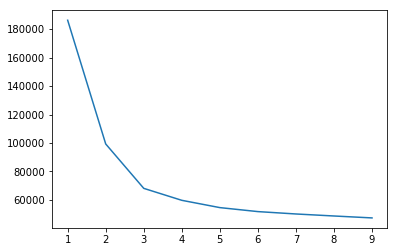

In [79]:
plt.plot(range(1,10),cwcss)

In [80]:
cwcss

[186240.0,
 99333.203583673632,
 68145.604879047678,
 59745.018013564339,
 54623.750400537196,
 51821.785317425063,
 50151.795234729332,
 48736.371435710913,
 47383.822270213102]

In [81]:
ckm_opt = KMeans(init='k-means++',n_clusters=3)

In [85]:
df_scaled = pd.DataFrame(s.fit_transform(df))

In [86]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [87]:
allwcss = []
for i in range (1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state = 42)
    km.fit(unlabelled_df)
    allwcss.append(km.inertia_)

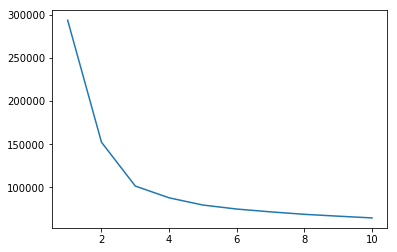

In [88]:
plt.plot(range(1,11),allwcss)

In [89]:
allwcss

[293871.94501718215,
 152254.77401296515,
 101370.13257501929,
 87699.769790128368,
 79321.827691465602,
 74682.723957134425,
 71415.189686525278,
 68557.959265048354,
 66404.623460321178,
 64383.655513799553]

In [90]:
ndf = df.drop(['instr','class'],axis = 1)

In [91]:
s = StandardScaler()

In [92]:
ndfs = pd.DataFrame(s.fit_transform(ndf))

In [93]:
ndfs.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [94]:
ndfs.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,...,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03
mean,-7.344278e-15,-1.382514e-15,2.960976e-16,1.688760e-15,-1.091681e-15,-2.070890e-16,2.644849e-15,-8.257618e-16,-2.114384e-15,2.001606e-15,...,-2.832251e-15,1.454354e-16,3.596054e-15,3.714783e-15,1.333717e-15,1.432836e-15,1.561485e-15,2.261345e-15,7.546464e-16,-1.237956e-15
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-4.021740e-01,-1.136118e+00,-1.322221e+00,-1.439189e+00,-1.613740e+00,-1.738145e+00,-1.621254e+00,-1.646630e+00,-1.645501e+00,-1.615594e+00,...,-1.783194e+00,-1.790026e+00,-1.817034e+00,-1.827343e+00,-1.730392e+00,-1.698417e+00,-1.839472e+00,-1.748929e+00,-1.668120e+00,-1.805160e+00
25%,-4.021740e-01,-1.136118e+00,-1.322221e+00,-6.934552e-01,-8.356154e-01,-9.403527e-01,-8.427308e-01,-8.646959e-01,-8.646760e-01,-8.337248e-01,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-9.445255e-01,-9.145943e-01,-2.486068e-01,-9.618909e-01,-8.939823e-01,-2.409479e-01
50%,-4.021740e-01,-4.580819e-01,1.605008e-01,5.227822e-02,-5.749034e-02,-1.425608e-01,-6.420806e-02,-8.276145e-02,-8.385143e-02,-5.185591e-02,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-1.586587e-01,-1.307718e-01,-2.486068e-01,-1.748524e-01,-1.198450e-01,-2.409479e-01
75%,-4.021740e-01,8.979896e-01,9.018615e-01,7.980117e-01,7.206347e-01,6.552312e-01,7.143147e-01,6.991730e-01,6.969731e-01,7.300129e-01,...,5.821153e-01,5.597111e-01,5.454215e-01,5.381232e-01,6.272081e-01,6.530507e-01,5.468257e-01,6.121861e-01,6.542923e-01,5.411584e-01
max,3.354893e+00,1.576025e+00,1.643222e+00,1.543745e+00,1.498760e+00,1.453023e+00,1.492837e+00,1.481107e+00,1.477798e+00,1.511882e+00,...,1.370552e+00,1.342957e+00,1.332907e+00,1.326612e+00,1.413075e+00,1.436873e+00,1.342258e+00,1.399225e+00,1.428430e+00,1.323265e+00


In [95]:
nwcss = []

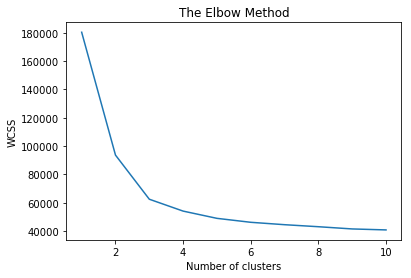

In [96]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ndfs)
    nwcss.append(kmeans.inertia_)
plt.plot(range(1, 11), nwcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
nwcss

[180420.0,
 93615.283505143962,
 62439.287408512377,
 54046.452313960297,
 48928.403045678264,
 46136.689350751105,
 44441.364284883966,
 43013.499254270217,
 41441.832494822178,
 40754.321103324524]

In [ ]:
#Best results so far have been obtained by dropping the instructor and class variables fom the data. 
# As seen in the elbow method, we can say that optimum number of clusters is 3.